# Report Lab 3 MARY Loïc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.inspection import permutation_importance

### Table of contents

* [1.Datasets](#chapter1)

* [2.Predicting Diabetes on the Pima Dataset](#chapter1)
    * [2.1 Know the data](#section_2_1)
    * [2.2 Bayesian decision and Linear Classification](#section_2_2)
        * [2.2.1 Linear Discriminant Analysis (LDA)](#section_2_2_1)
            * [2.2.1.1 Default Model](#section_2_2_1_1)
            * [2.2.1.2 Best parameters](#section_2_2_1_2)
        * [2.2.2 Quadratic Discriminant Analysis (QDA)](#section_2_2_2)
            * [2.2.2.1 Default Model](#section_2_2_2_1)
            * [2.2.2.2 Best parameters](#section_2_2_2_2)
        * [2.2.3 Gaussian Naive Bayes](#section_2_2_3)
        * [2.2.4 Logistic Regression](#section_2_2_4)
            * [2.2.4.1 Default Model](#section_2_2_4_1)
            * [2.2.4.2 Best parameters](#section_2_2_4_2)
        * [2.2.5 Review of Bayesian Decision & Linear Classification](#section_2_2_5)
    * [2.3 Non linear Methods](#section_2_3)
        * [2.3.1 Random Forest Classifier](#section_2_3_1)
            * [2.3.1.1 Default Model](#section_2_3_1_1)
            * [2.3.1.2 Best parameters](#section_2_3_1_2)
        * [2.3.2 Support Vector Classifier (SVC)](#section_2_3_2)
            * [2.3.2.1 Default Model](#section_2_3_2_1)
            * [2.3.2.2 Best parameters](#section_2_3_2_2)
        * [2.3.3 Multi Layers Perceptrons Classifier (MLP)](#section_2_3_3)
            * [2.3.3.1 Default Model](#section_2_3_3_1)
            * [2.3.3.2 Best parameters](#section_2_3_3_2)
        * [2.3.4 Gradient Boosting Classifier](#section_2_3_4)
            * [2.3.4.1 Default Model](#section_2_3_4_1)
            * [2.3.4.2 Best parameters](#section_2_3_4_2)
    * [2.4 Comparison & Interpretation](#section_2_4)
    
* [3.Predicting classes on the digits dataset](#chapter3)
    * [3.1 Evaluate the different supervised methods](#section_3_1)
        * [3.1.1 Linear Discriminant Analysis (LDA)](#section_3_1_1)
            * [3.1.1.1 Default Model](#section_3_1_1_1)
            * [3.1.1.2 Best parameters](#section_3_1_1_2)
        * [3.1.2 Logistic Regression](#section_3_1_2)
            * [3.1.2.1 Default Model](#section_3_1_2_1)
            * [3.1.2.2 Best parameters](#section_3_1_2_2)
        * [3.1.3 Support Vector Classifier (SVC)](#section_3_1_3)
            * [3.1.3.1 Default Model](#section_3_1_3_1)
            * [3.1.3.2 Best parameters](#section_3_1_3_2)
        * [3.1.4 Multi Layers Perceptrons Classifier (MLP)](#section_3_1_4)
            * [3.1.4.1 Default Model](#section_3_1_4_1)
            * [3.1.4.2 Best parameters](#section_3_1_4_2)
    * [3.2 Interpreting the classifier](#section_3_2)
        * [3.2.1 Review of all models](#section_3_2_1)
        * [3.2.2 Study with the best model](#section_3_2_2)
            * [3.2.2.1 Performances](#section_3_2_2_1)
            * [3.2.2.2 Adversial examples](#section_3_2_2_2)

* [4.BONUS CNN](#chapter4)    
        
    
        
        


# 1. Datasets<a class="anchor" id="chapter1"></a>

# Load digit dataset

In [2]:
digit = np.load("digits.npz")

Because digit['x'].shape[0] > digit['xt'].shape[0] , I consider that x and y are the training dataset and xt,yt the test dataset

In [3]:
x2_train = (1/255)*digit['x']
y2_train = np.ravel(digit["y"])

x2_test = (1/255)*digit['xt']
y2_test = np.ravel(digit["yt"])


Text(0.5, 1.0, 'Proportion of each label in the training dataset')

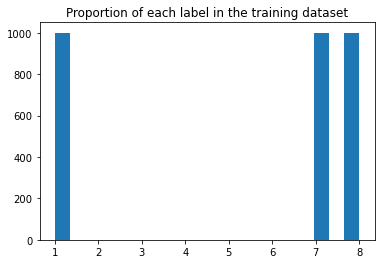

In [5]:
plt.hist(y2_train,bins=20)
plt.title("Proportion of each label in the training dataset")

In the training dataset , all the classes are balanced. Indeed, for each class, there is the same number of samples (1000). There are 3 classes and each class represents 1/3 of the dataset

# Load pima dataset

In [7]:
pima = np.load("pima.npz")

In [8]:
pima.files

['xall', 'yall', 'varnames']

In [9]:
list(pima['varnames'])

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
Xall = pima['xall']
Yall = pima['yall']

In [11]:
Xall.shape

(709, 8)

In [12]:
df = pd.DataFrame(Xall, columns = list(pima['varnames']))
df['diabete'] = Yall

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabete
0,7.0,159.0,64.0,0.0,0.0,27.4,0.294,40.0,-1
1,0.0,180.0,66.0,39.0,0.0,42.0,1.893,25.0,1
2,1.0,146.0,56.0,0.0,0.0,29.7,0.564,29.0,-1
3,2.0,71.0,70.0,27.0,0.0,28.0,0.586,22.0,-1
4,7.0,103.0,66.0,32.0,0.0,39.1,0.344,31.0,1


# Discussion about the metrics used in the lab

This lab is a classification lab. Thus all samples belong to an unique class.
<br/>
For the pima dataset , the classes are -1 (not diabetic) and 1 (diabetic).
<br/>
For the digit dataset , the classes are 1, 7 and 8.
<br/><br/>
The first metric is the Accuracy (ACC) , it gives the proportion of good classification on the test dataset. More ACC is close to 1 , and more the model predicts well the class.
<br/><br/>
The other metric is the Area Under the Receiver Operating Curve (AUC), it measures the capacity of a model to separe well the classes. We plot the True Positive Rate depending on the False Positive rate with different threshold. The threshold allows to assign a class to a sample (by default it's 0.5 , if the propability to belong to class 1 is higher than 0.5 than this element is classified in class 1). Then, we measure the area under this curve. More the AUC is close to 1 and more the model has a very good capacity to separe the class and thus to have a model that predicts wery well.
<br/><br/>
An important thing is that all those metrics are computed on the test dataset and the best parameters are estimated in a validation set (part of the training set) through GridSearch CV !

# 2.Predicting Diabetes on the Pima dataset<a class="anchor" id="chapter2"></a>

# 2.1 Know the data<a class="anchor" id="section_2_1"></a>

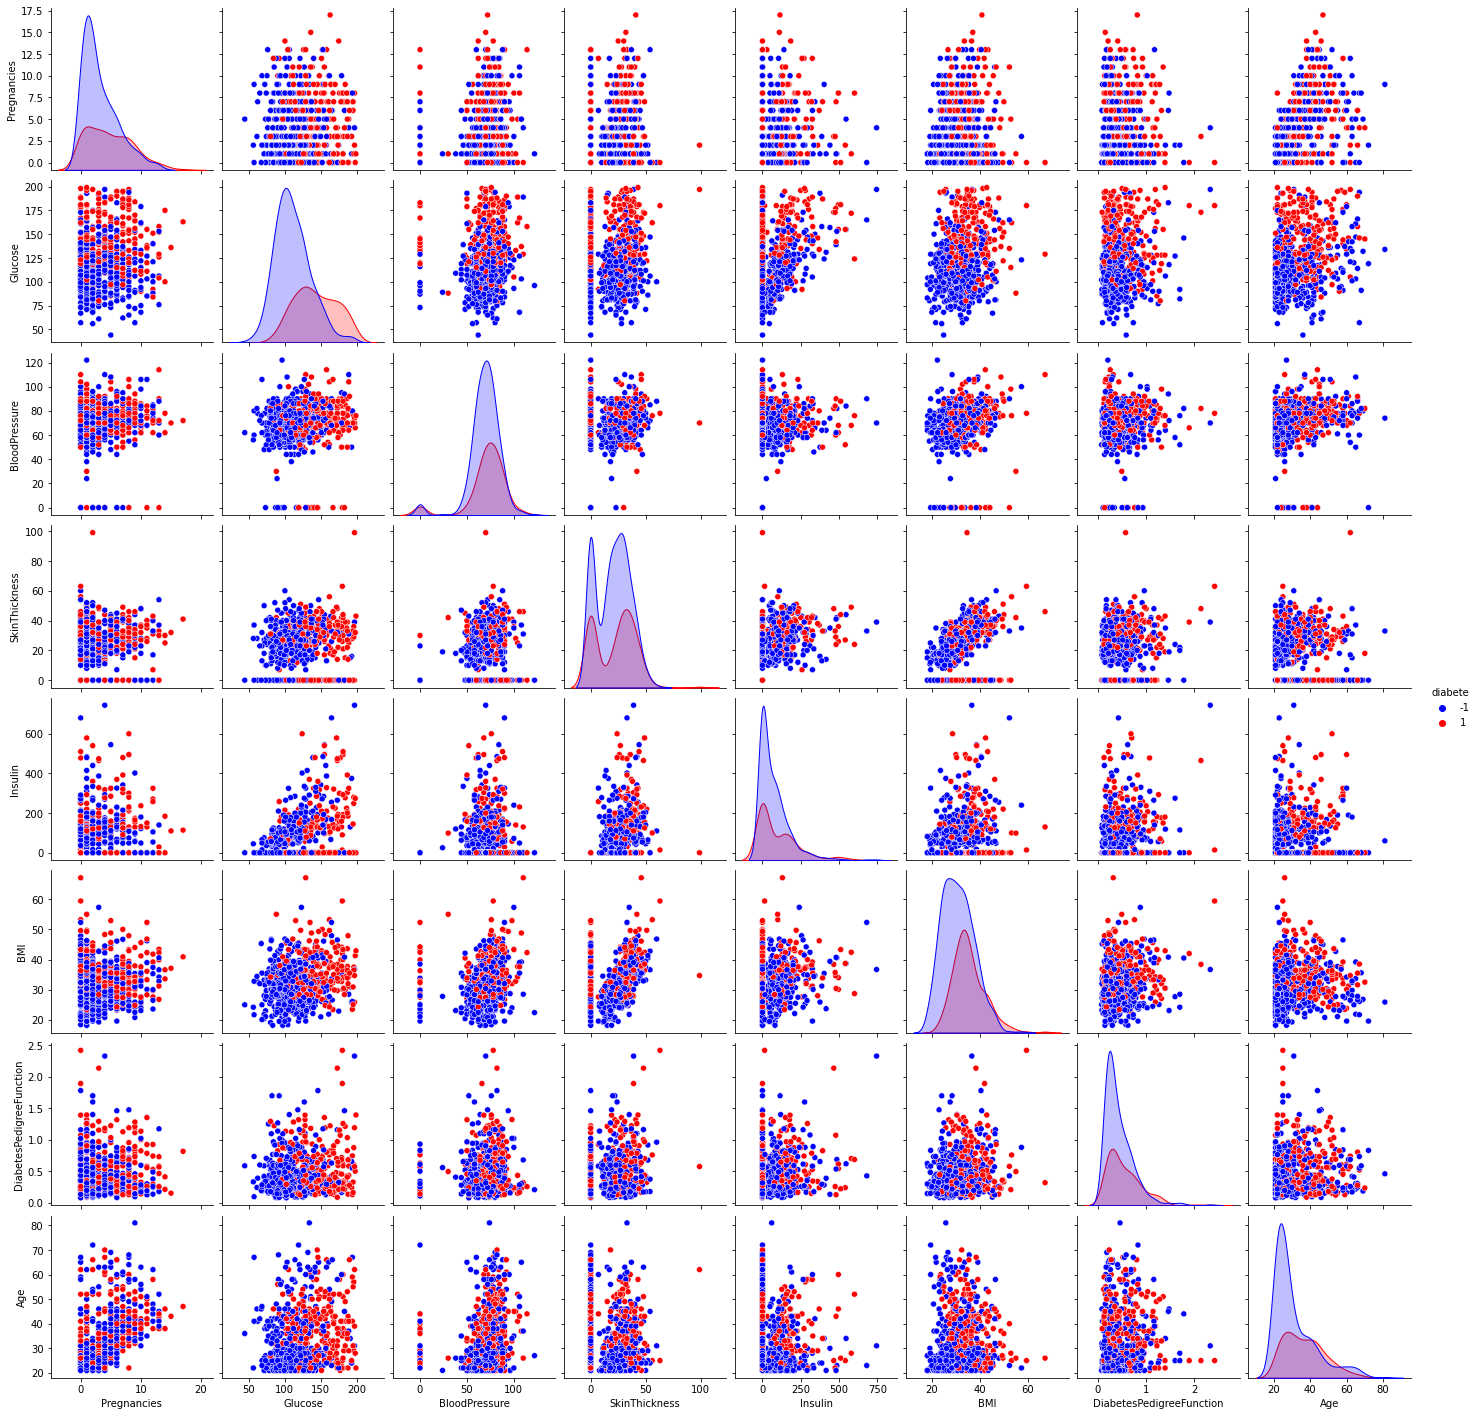

In [14]:
sns.pairplot(df, hue = 'diabete' , palette = ["blue",'red'])

To see the variables that seem to help predict the class , the histograms are better tool than scatter plot because we can directly see if the distributions created by 2 variables are similar or not. There are always for pairplot , 2 distributions that represent each class. So we can see the repartition of a feature depending on the class.

We remark in the diagonal of the plot above that for the features Glucose, BMI and Age , the two distributions are not the same. They dont' have the same mean and variance.
<br/> What is interesting is that thoses features are linked to the diabete desease from a medical point of view :
- The older you get, the more likely you are to have diabetes because the pancreas is not working as well
- the higher the blood glucose threshold, the more likely you are to have diabetes 
- The BMI (Body Mass Index) , if it is high can mean that the patient is obese and therefore he has more chance to have diabete

An other interesting representation can be the correlation matrix to see the correlation between all the variables and more precisely the correlation between all the features and the target variable "

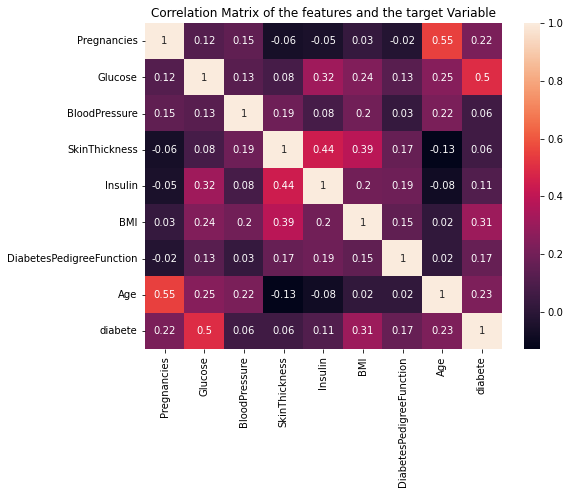

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(round(df.corr(),2), annot=True)
plt.title("Correlation Matrix of the features and the target Variable")
plt.show()

We should focus on the last colums which represents the correlation between the target variable "diabete" (Y) and all the others features. We remark that the variables most (positively) correlated to Y are "Glucose","BMI" and "Age". Thoses are the features that I highlight the importance to predict Y with the histograms.

In [16]:
round(df.describe(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabete
count,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00
mean,3.75,121.61,69.64,20.77,80.53,32.45,0.47,33.02,-0.32
std,3.34,30.49,18.14,15.90,112.68,6.95,0.33,11.67,0.95
min,0.00,44.00,0.00,0.00,0.00,18.20,0.08,21.00,-1.00
25%,1.00,99.00,64.00,0.00,0.00,27.50,0.24,24.00,-1.00
50%,3.00,117.00,72.00,23.00,40.00,32.30,0.37,29.00,-1.00
75%,6.00,141.00,80.00,32.00,130.00,36.60,0.63,40.00,1.00
max,17.00,199.00,122.00,99.00,744.00,67.10,2.42,81.00,1.00


The features have not the same variance and the same scaling. It is important for all the features in a model to have the same scaling, so we should normalize the data. Indeed, it equalizes the weight of each feature and it allows some algorithms to converge faster or to work simply.

In the following parts, we will split our dataset in a train and test set to evaluate the performance of several models to determine if a patient given the features, is diabetic or not.

In [17]:
Xall_train, Xall_test, Yall_train, Yall_test = train_test_split(Xall, Yall, train_size=300, random_state=42)

In [18]:
print(f"Number of elements in class 1 : {np.sum(Yall_train[Yall_train == 1])}")
print(f"Number of elements in class -1 : {np.abs(np.sum(Yall_train[Yall_train == -1]))}")

Number of elements in class 1 : 112
Number of elements in class -1 : 188


In the training set, there are a bit more of examples for the class -1 but there is not a class that is predominant. So, the model can really train effectively and its capacity to generalize could be good.

In [19]:
#Standardization of the data
scaler = StandardScaler()
scaler.fit(Xall_train)
X_train_norm = scaler.transform(Xall_train)
X_test_norm = scaler.transform(Xall_test)

In [20]:
def performances_model_default(model,X_train_norm,Yall_train,X_test_norm,Yall_test):
    model.fit(X_train_norm , Yall_train)
    auc = roc_auc_score(Yall_test, model.predict_proba(X_test_norm)[:, 1])
    acc = model.score(X_test_norm ,Yall_test)
    
    name_model = str(model).replace('()','')
    
    dic={}
    dic['model'] = name_model
    dic['AUC'] = round(auc,3)
    dic['ACC'] = round(acc,3)
    
    
    return dic
    
    

In [21]:
def performances_grid_model(model,grid_parameters,X_train_norm,Yall_train,X_test_norm,Yall_test):
    model_grid = GridSearchCV(model,grid_parameters,cv=5,scoring='accuracy')
    model_grid.fit(X_train_norm,Yall_train)
    
    auc = roc_auc_score(Yall_test, model_grid.predict_proba(X_test_norm)[:, 1])
    acc = model_grid.score(X_test_norm ,Yall_test)
    
    name_model = str(model).replace('()','')
    
    dic={}
    dic['model'] = name_model
    dic['AUC'] = round(auc,3)
    dic['ACC'] = round(acc,3)
    dic['Best Parameters'] = model_grid.best_params_
    
    return dic
    

# 2.2 Bayesian decision and linear classification<a class="anchor" id="section_2_2"></a>

# 2.2.1 Linear Discriminant Analysis (LDA)<a class="anchor" id="section_2_2_1"></a>

# 2.2.1.1 Default Model<a class="anchor" id="section_2_2_1_1"></a>

The default parameter for LDA is : 
- shrinkage = None (no shrinkage)

In [22]:
performances_model_default(LinearDiscriminantAnalysis(),X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'LinearDiscriminantAnalysis', 'AUC': 0.831, 'ACC': 0.787}

# 2.2.1.2 Best Parameters<a class="anchor" id="section_2_2_1_2"></a>

In [23]:
parameters_lda = {'shrinkage': np.linspace(0,1,100)}

In [24]:
performances_grid_model(LinearDiscriminantAnalysis(solver='eigen'),parameters_lda,X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': "LinearDiscriminantAnalysis(solver='eigen')",
 'AUC': 0.853,
 'ACC': 0.797,
 'Best Parameters': {'shrinkage': 0.37373737373737376}}

It seems that LDA with a shrinkage of 0.38 gives best result than LDA with default parameter. Shrinkage is a regularization parameter that reduce overfitting. Thus, the capacity of this model to generalize is better.
<br/><br/>
The metrics are quite close to 1 , which means that this a good model. But it is difficult to judge its performance without comparing it with others models.

# 2.2.2 Quadratic Discriminant Analysis (QDA)<a class="anchor" id="section_2_2_2"></a>

# 2.2.2.1 Default Mode<a class="anchor" id="section_2_2_2_1"></a>

The default parameter for QDA is :
- reg_param = 0

In [25]:
performances_model_default(QuadraticDiscriminantAnalysis(),X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'QuadraticDiscriminantAnalysis', 'AUC': 0.814, 'ACC': 0.768}

# 2.2.2.2 Best Parameters<a class="anchor" id="section_2_2_2_2"></a>

In [26]:
parameters_qda = {"reg_param" : np.linspace(0,1,100)}

In [27]:
performances_grid_model(QuadraticDiscriminantAnalysis(),parameters_qda,X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'QuadraticDiscriminantAnalysis',
 'AUC': 0.828,
 'ACC': 0.775,
 'Best Parameters': {'reg_param': 0.19191919191919193}}

It seems that QDA with reg_param = 0.20 is better than QDA with default parameter. The reason can be that reg_param is a regularization parameter and most of the time regularization increase the capacity of a model to generalize.
<br/><br/>
But this model is not better than LDA even if its metrics are good.

# 2.2.3 Gaussian Naive Bayes<a class="anchor" id="section_2_2_3"></a>

In [28]:
gnb = GaussianNB()
gnb.fit(X_train_norm,Yall_train)

GaussianNB()

In [29]:
performances_model_default(GaussianNB(),X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'GaussianNB', 'AUC': 0.842, 'ACC': 0.804}

In terms of AUC , Gaussian Naive Bayes is better than QDA but less efficient than LDA. But , regarding ACC , this model is better than the previous one.

# 2.2.4 Logistic Regression<a class="anchor" id="section_2_2_4"></a>

# 2.2.4.1 Default Model<a class="anchor" id="section_2_2_4_1"></a>

The default parameter for Logistic Regression is :
- C = 1.0

In [30]:
performances_model_default(LogisticRegression(random_state=0),X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'LogisticRegression(random_state=0)', 'AUC': 0.832, 'ACC': 0.775}

# 2.2.4.2 Best Parameters<a class="anchor" id="section_2_2_4_2"></a>

In [31]:
parameters_lr = {"C" : np.linspace(0.1,10,100) , "solver" : ['liblinear' , 'saga']}


In [32]:
performances_grid_model(LogisticRegression(penalty='l1',random_state=0),parameters_lr,X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': "LogisticRegression(penalty='l1', random_state=0)",
 'AUC': 0.83,
 'ACC': 0.775,
 'Best Parameters': {'C': 3.5000000000000004, 'solver': 'saga'}}

The model with the best parameter C is better than the default one because of the regularization C. The model is better with an important regularization.

In terms of ACC and AUC, Logistic Regression is the worst model so far.

Let's see the value of the weighs of each feature to interpret them.

In [33]:
lr_best = LogisticRegression(penalty='l1',random_state=0,C=3.5000000000000004,solver='saga')
lr_best.fit(X_train_norm,Yall_train)

LogisticRegression(C=3.5000000000000004, penalty='l1', random_state=0,
                   solver='saga')

In [110]:
coeff_lr = {}
coeff_lr["weight"] = lr_best.coef_[0]
coeff_lr["Correlation with diabete"] = df.corr()['diabete']
coeff_lr_dataframe = pd.DataFrame(coeff_lr,index=list(pima['varnames']))
display(coeff_lr_dataframe)

,weight,Correlation with diabete
Pregnancies,0.594613,0.220255
Glucose,1.435167,0.499845
BloodPressure,-0.366214,0.056029
SkinThickness,0.012138,0.055354
Insulin,-0.109993,0.113659
BMI,0.442325,0.311803
DiabetesPedigreeFunction,0.319019,0.174826
Age,-0.233396,0.229811


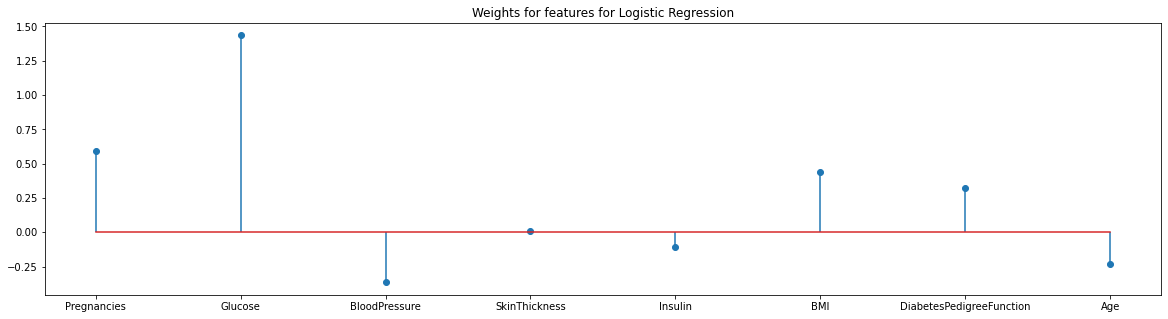

In [117]:
plt.figure(figsize=(20,5))
plt.stem(list(pima['varnames']), np.ravel(lr_best.coef_[0]),use_line_collection=True)
plt.title("Weights for features for Logistic Regression")
plt.show()

Even with a L1 penalization, any weight is equal to 0. But we remark that for the feature "SkinThickness", its weight has not  the same order of magnitude as the other features. Indeed, for the majority of the features, their weights are around 1 or 0.1 (in absolute value) but for "SkinThickness" it is around 0.01.
<br/> So it seems that this feature is less important in the model than the others. And in fact, if we see the correlation between "SkinThickness" and "diabete", it is equal to 0.06 (pretty close to 0), so it makes sense ! 

# 2.2.4 Review of Bayesian decision & Linear Classification<a class="anchor" id="section_2_2_4"></a>

Let's recap the performance of all models used so far 

,AUC,ACC
LDA,0.853,0.797
QDA,0.828,0.775
Gaussian NB,0.842,0.804
Logistic Regression,0.830,0.775


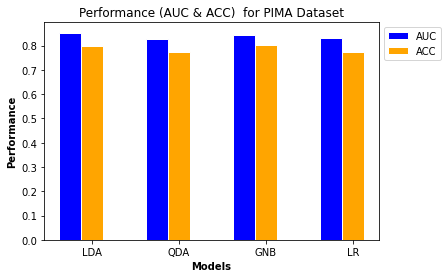

In [35]:
dic_linear_model = {}
Models = ["LDA","QDA","Gaussian NB","Logistic Regression"]
dic_linear_model["AUC"] = [0.853,0.828,0.842,0.830]
dic_linear_model["ACC"] = [0.797,0.775,0.804,0.775]
perf_linear_model_dataframe = pd.DataFrame(dic_linear_model,index = Models)
display(perf_linear_model_dataframe)


# set width of bars
barWidth = 0.25
Models_bis = ["LDA","QDA","GNB","LR"]
# set heights of bars
bars1 = dic_linear_model["AUC"]
bars2 = dic_linear_model["ACC"]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='AUC')
plt.bar(r2, bars2, color='orange', width=barWidth, edgecolor='white', label='ACC')

 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Performance', fontweight='bold')
plt.title("Performance (AUC & ACC)  for PIMA Dataset")
plt.xticks([r + barWidth for r in range(len(bars1))], Models_bis)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Generally, LDA is the best model so far. But in terms of ACC, Gaussian Naive Bayes is is a little better than LDA.
As AUC measures the capacity of separibility of classes, I consider that this metric is more interesting than ACC to estimate the capacity of generalization of a model (even if a good model should have also an ACC close to 1).
<br/><br/>
But it is important to note that the metrics for all those models are quite close . They are all superior than 0.80 (for AUC) and 0.78 (for ACC) which mean that those models are quite performant to separate well the class and thus to predict well the class for new samples.

Let's compare those performances with non linear methods

# 2.3 Nonlinear methods<a class="anchor" id="section_2_3"></a>

Remark : For those models I don't use linspace or logspace for SearchGrid CV , because my computer made too long time to give a result! So I use several values that fill the space of integers that I wanted to explore.

# 2.3.1 Random Forest Classifier<a class="anchor" id="section_2_3_1"></a>

# 2.3.1.1 Default Model<a class="anchor" id="section_2_3_1_1"></a>

The default parameters for Random Forest Classifier are :
- n_estimators = 100
- criterion = 'gini'
- max_dept = None

In [36]:
performances_model_default(RandomForestClassifier(random_state = 0),X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'RandomForestClassifier(random_state=0)', 'AUC': 0.844, 'ACC': 0.78}

# 2.3.1.2 Best Parameters<a class="anchor" id="section_2_3_1_2"></a>

In [37]:
parameters_rfc = {'n_estimators' : [5,10,30,50,100,150,200,250,300 ], 'criterion' : ['gini','entropy'],
                  'max_depth' : [5,10,30,50,100,150,200,250,300]+[None]}

In [38]:
performances_grid_model(RandomForestClassifier(random_state = 0),parameters_rfc,X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'RandomForestClassifier(random_state=0)',
 'AUC': 0.838,
 'ACC': 0.782,
 'Best Parameters': {'criterion': 'entropy',
  'max_depth': 30,
  'n_estimators': 150}}

It seems that the model with the best parameter is slighty better than the default one for ACC but less better for ACC.

# 2.3.2 Support Vector Classification<a class="anchor" id="section_2_3_2"></a>

# 2.3.2.1 Default Model<a class="anchor" id="section_2_3_2_1"></a>

The default parameters are :
- C : 1.0
- kernel : 'rbf'
- degree = 3 (for polynomial kernel)

In [39]:
performances_model_default(SVC(probability=True),X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'SVC(probability=True)', 'AUC': 0.833, 'ACC': 0.785}

# 2.3.2.2 Best parameters<a class="anchor" id="section_2_3_2_2"></a>

In [40]:
parameters_svc = {'kernel': ['poly','rbf']}

In [41]:
performances_grid_model(SVC(probability=True),parameters_svc,X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'SVC(probability=True)',
 'AUC': 0.799,
 'ACC': 0.765,
 'Best Parameters': {'kernel': 'poly'}}

In [42]:
parameters_svc = {'C': np.linspace(1,10,10),'kernel': ['poly'],'degree':[1,2,3,4,5],}

In [43]:
performances_grid_model(SVC(probability=True),parameters_svc,X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'SVC(probability=True)',
 'AUC': 0.833,
 'ACC': 0.782,
 'Best Parameters': {'C': 7.0, 'degree': 1, 'kernel': 'poly'}}

The default model is better than any SVC models with customized parameters.

# 2.3.3 Multi Layers Perceptron Classifier<a class="anchor" id="section_2_3_3"></a>

# 2.3.3.1 Default Model<a class="anchor" id="section_2_3_3_1"></a>

The default parameter for MLP is :
- hidden_layer_sizes = (100,)

In [44]:
performances_model_default(MLPClassifier(random_state=1 ),X_train_norm,Yall_train,X_test_norm,Yall_test)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'model': 'MLPClassifier(random_state=1)', 'AUC': 0.826, 'ACC': 0.748}

# 2.3.3.2 Best Parameters<a class="anchor" id="section_2_3_3_2"></a>

In [45]:
parameters_mlp = {'hidden_layer_sizes':[(50,),(100,),(200,),(500,)]}

In [46]:
performances_grid_model(MLPClassifier(random_state=1, max_iter = 1000),parameters_mlp,X_train_norm,Yall_train,X_test_norm,Yall_test)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neural_netwo

{'model': 'MLPClassifier(max_iter=1000, random_state=1)',
 'AUC': 0.805,
 'ACC': 0.756,
 'Best Parameters': {'hidden_layer_sizes': (100,)}}

In [47]:
parameters_mlp = {'hidden_layer_sizes':[(100,50),(100,100),(100,200),(100,500)]}

In [48]:
performances_grid_model(MLPClassifier(random_state=1, max_iter = 500),parameters_mlp,X_train_norm,Yall_train,X_test_norm,Yall_test)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neural_network\_

{'model': 'MLPClassifier(max_iter=500, random_state=1)',
 'AUC': 0.806,
 'ACC': 0.758,
 'Best Parameters': {'hidden_layer_sizes': (100, 100)}}

It seems that default MLP model is better in terms of ACC but less efficient than the model with the parameter (100,100) for AUC

# 2.3.4 Gradient Boosting Classifier<a class="anchor" id="section_2_3_4"></a>

# 2.3.4.1 Default Model<a class="anchor" id="section_2_3_4_1"></a>

The default parameters are :
- n_estimators = 100
- max_depth = 3

In [49]:
performances_model_default(GradientBoostingClassifier(random_state=0),X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'GradientBoostingClassifier(random_state=0)',
 'AUC': 0.837,
 'ACC': 0.778}

# 2.3.4.2 Best Parameters<a class="anchor" id="section_2_3_4_2"></a>

In [50]:
parameters_gbc = {'n_estimators': [10,50,100,150,200,350,500],'max_depth':[1,5,10,50,100,150,300,500]}

In [51]:
performances_grid_model(GradientBoostingClassifier(random_state=0),parameters_gbc,X_train_norm,Yall_train,X_test_norm,Yall_test)

{'model': 'GradientBoostingClassifier(random_state=0)',
 'AUC': 0.822,
 'ACC': 0.78,
 'Best Parameters': {'max_depth': 5, 'n_estimators': 100}}

The default model is better in terms of AUC but less performant than the model with the best parameter for ACC.

# 2.4 Comparison and interpretation<a class="anchor" id="section_2_4"></a>

,AUC,ACC
LDA,0.853,0.797
QDA,0.828,0.775
Gaussian NB,0.842,0.804
Logistic Regression,0.830,0.775
Random Forest Classifier,0.844,0.780
SVC,0.833,0.785
MLP,0.826,0.748
Gradient Boosting Classifier,0.837,0.778


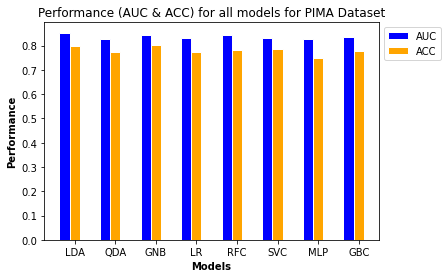

In [52]:
dic_all_models = {}
Models = ["LDA","QDA","Gaussian NB","Logistic Regression","Random Forest Classifier","SVC","MLP","Gradient Boosting Classifier"]
dic_all_models["AUC"] = [0.853,0.828,0.842,0.830,0.844,0.833,0.826,0.837]
dic_all_models["ACC"] = [0.797,0.775,0.804,0.775,0.780,0.785,0.748,0.778]
perf_all_models_dataframe = pd.DataFrame(dic_all_models,index = Models)
display(perf_all_models_dataframe)

# set width of bars
barWidth = 0.25
Models_bis = ["LDA","QDA","GNB","LR","RFC","SVC","MLP","GBC"]
# set heights of bars
bars1 = dic_all_models["AUC"]
bars2 = dic_all_models["ACC"]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='AUC')
plt.bar(r2, bars2, color='orange', width=barWidth, edgecolor='white', label='ACC')

 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Performance', fontweight='bold')
plt.title("Performance (AUC & ACC) for all models for PIMA Dataset")
plt.xticks([r + barWidth for r in range(len(bars1))], Models_bis)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

1) It seems that LDA and Gaussian Naive Bayes are the best models. Those are linear and Bayesian methods.
LDA is the best model in terms of AUC and Gaussian Naive Bayes in terms of ACC. But the two models have very close performance for the two metrics. But, it is important to note that all those models have metrics that are superior than 0.75 which show that they are good models. The fact that LDA is the best model can come from the fact that this model focuses on maximizing the separatibility between classes.

2) As I consider LDA as the best model, let's illustrate the separability of the sample in the predictions through histograms

In [53]:
lda_best = LinearDiscriminantAnalysis(shrinkage=0.37373737373737376 , solver = 'eigen')


In [54]:
lda_best.fit(X_train_norm,Yall_train)

LinearDiscriminantAnalysis(shrinkage=0.37373737373737376, solver='eigen')

In [55]:
X_proba = lda_best.predict_proba(X_test_norm)

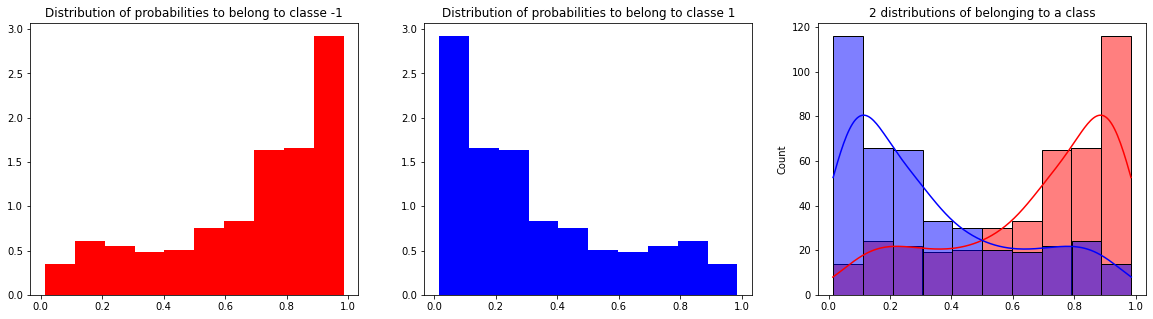

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(X_proba[:,0],density=True ,color="red")
plt.title("Distribution of probabilities to belong to classe -1")


plt.subplot(1,3,2)
plt.hist(X_proba[:,1],density=True,color="blue")
plt.title("Distribution of probabilities to belong to classe 1")

plt.subplot(1,3,3)
sns.histplot(X_proba[:,0], kde=True , color="red")
sns.histplot(X_proba[:,1], kde=True , color="blue" )
plt.title("2 distributions of belonging to a class")
plt.show()

We remark that the distributions of belonging to class -1 or 1 have different means. So it means that the model can separate well the data to the extent that the probability to belong to a class is not 0.5 (if this probability was equal to 0.5, which means that the model is not able to separate data in 2 classes because 0.5 is the random probability , the distributions should not be separate). Indeed, here , we have 2 distincts distributions.

Let's now interpret the weight of this good linear model 

In [111]:
coeff_lda = {}
coeff_lda["weight"] = np.ravel(lda_best.coef_)
coeff_lda["Correlation with diabete"] = df.corr()['diabete']
coeff_lda_dataframe = pd.DataFrame(coeff_lda,index=list(pima['varnames']))
display(coeff_lda_dataframe)


,weight,Correlation with diabete
Pregnancies,0.418460,0.220255
Glucose,1.270912,0.499845
BloodPressure,-0.197025,0.056029
SkinThickness,0.009763,0.055354
Insulin,0.060893,0.113659
BMI,0.484852,0.311803
DiabetesPedigreeFunction,0.278708,0.174826
Age,0.125390,0.229811


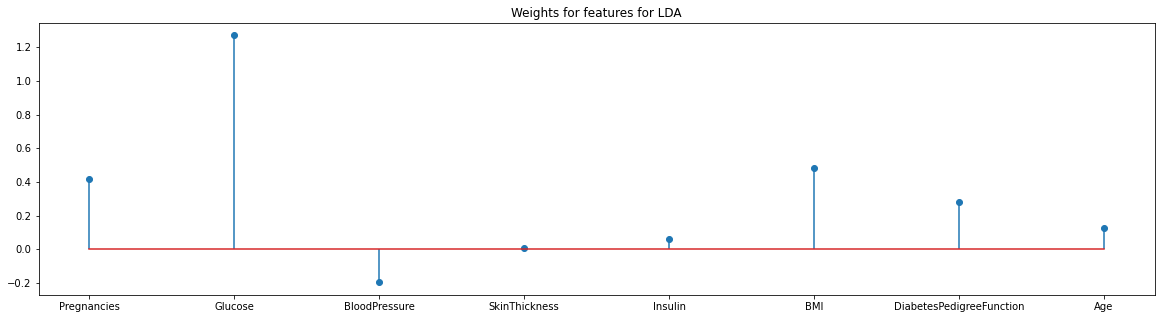

In [118]:
plt.figure(figsize=(20,5))
plt.stem(list(pima['varnames']), np.ravel(lda_best.coef_),use_line_collection=True)
plt.title("Weights for features for LDA")
plt.show()

The weights go from -0.20 to 1.30. It seems that more the coefficient is close to 1.30 and more the correlation with the target variable "diabete" is close to 1 generally. The weight for glucose and BMI are the most important (in absolute values) and their correlations with "diabete" are also the most closer to 1. So thoses features are important in the model and they make medical sense (cf to the section 2.1 know the data).
<br/>
<br/>
- Pregnancies : its weight is the third highest in the model. The number of pregnancies can lead to a diabete because during the pregnancy ,there is  an increase in the blood sugar in the mother-to-be because of the baby. It can lead to a diabete of type II if the number of pregnancies increases. So , it makes medical sense.
- BloodPressure : has a low weight and correlation with diabete. But for diabetic people, an important bloodpressure is a consequence of the diabete , so it makes sense that it has not such importance in the model
- SkinThickness & Insulin : have  very low weights (close to 0). Diabetic people can not produce enough insulin, so if we measure the rate of insulin in blood, it can help predict if the person is diabetic or not , so it is surprising that this feature is not important
- DiabetesPedigreeFunction : say if someone in the family is diabetic. This disease can be hereditary but it is not automatic , but this feature can be useful to detect diabete. Its weight is pretty important anyway even if its correlation with Y is not as important as expected.
- Age : has an important correlation with Y for the reason explained in section 2.1 , but surprisingly its weight is not high in absolute value

3)  I will now compute the confusion matrix for this model

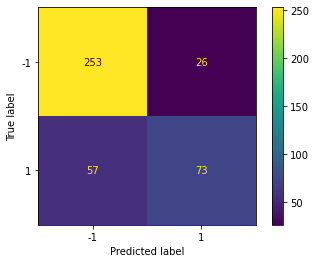

In [57]:
cm = confusion_matrix(Yall_test,lda_best.predict(X_test_norm))
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lda_best.classes_)
cm_disp.plot()


With the confusion matrix, we can use 2 others metrics :
- precision for each class
- recall for each class.

<br/>
The precision for a class i  measures the rate of good classification in the class i among all the examples that have been classified in the class i
<br/>

The recall for a class i  measures the rate of good classification for elements that really belong to class i

In [58]:
print(classification_report(Yall_test,lda_best.predict(X_test_norm), target_names=['class -1','class 1']))

              precision    recall  f1-score   support

    class -1       0.82      0.91      0.86       279
     class 1       0.74      0.56      0.64       130

    accuracy                           0.80       409
   macro avg       0.78      0.73      0.75       409
weighted avg       0.79      0.80      0.79       409



We remark that the model distinguishes non diabetic class better than the diabetic class. It can comes from the fact that in the training set, there are  more examples of non diabetic.
<br/>
The recall of 0.56 for the class 1 shows us that the model classifies 56% of diabetic patients as diabetic patients whereas the model classifies 91% of non diabetic patients as non diabetic patients.
<br/>
The precision on classe -1 teaches us that among the examples classified in the class -1 , 82% of them are really non diabetic patients.

 

In this situation , the false negative rate is relative to patients that are not diagnosed diabetic but they  not diabetic for real . If this number is to big, it could be dangerous because if the decision of a doctor is based on this model, he cannot give to patient treatments and that may be dangerous for him. 

In [59]:
false_negative_rate = cm[1][0]/sum(cm[1])
print(f"False Negative Rate : {round(false_negative_rate,2)}")

False Negative Rate : 0.44


Here this rate is around 44%, is is very closer to 50%, so it is dangerous to rely on this model for  decision-making !
Let's change the value of the threshold for predicted values to hope to decrease the false negative rate.

In [60]:
def best_intercept_lda(model,intercept_list,X_train_norm,Yall_train,X_test_norm,Yall_test):
    FNR = []
    for intercept in intercept_list:
        
        model.fit(X_train_norm,Yall_train)
        model.intercept_ = intercept
        cm = confusion_matrix(Yall_test,model.predict(X_test_norm))
        false_negative_rate = cm[1][0]/sum(cm[1])
        FNR.append(false_negative_rate)
    FNR_array = np.array(FNR)
    best_intercept = intercept_list[FNR_array< 0.1][0]
    plt.plot(intercept_list,FNR)
    plt.axhline(y=0.1 , c="red")
    plt.title("FNR depending on intercept")
    plt.show()
    print(f"The best intercept is : {best_intercept}")
        

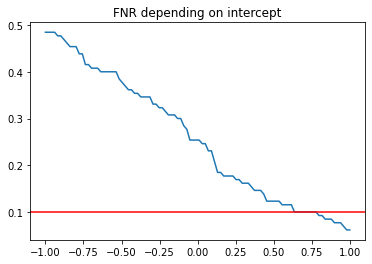

The best intercept is : 0.7979797979797982


In [61]:
intercept_list = np.linspace(-1,1,100)
best_intercept_lda(lda_best,intercept_list,X_train_norm,Yall_train,X_test_norm,Yall_test)

So, the best intercept is around 0.80. Let's see the performance of an LDA with the best parameter and this intercept.

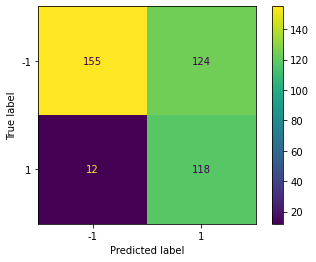

In [62]:
lda_best_bis = LinearDiscriminantAnalysis(shrinkage=0.37373737373737376 , solver = 'eigen')
lda_best_bis.fit(X_train_norm,Yall_train)
lda_best_bis.intercept_ = 0.80
cm_bis = confusion_matrix(Yall_test , lda_best_bis.predict(X_test_norm))
cm_disp_bis = ConfusionMatrixDisplay(confusion_matrix=cm_bis , display_labels=lda_best_bis.classes_)
cm_disp_bis.plot()


In [63]:
print(classification_report(Yall_test,lda_best_bis.predict(X_test_norm), target_names=['class -1','class 1']))

              precision    recall  f1-score   support

    class -1       0.93      0.56      0.70       279
     class 1       0.49      0.91      0.63       130

    accuracy                           0.67       409
   macro avg       0.71      0.73      0.66       409
weighted avg       0.79      0.67      0.68       409



In [64]:
auc = roc_auc_score(Yall_test, lda_best_bis.predict_proba(X_test_norm)[:, 1])
print(f"AUC : {round(auc,3)}")

AUC : 0.853


By using this intercept, the accuracy decreases but the AUC is still the same. It is because some True Negative are now consider as False Positive. And the precision and the recall of each class is therefore also modified because the threshold changed , so allocation to classes is strongly impacted.

Now, let's work on the digits dataset

# 3. Predicting classes on the Digits dataset<a class="anchor" id="chapter3"></a>

In [119]:
def performances_model_default_digit(model,x2_train ,y2_train,x2_test ,y2_test):
    model.fit(x2_train , y2_train)
    auc = roc_auc_score(y2_test, model.predict_proba(x2_test), multi_class = 'ovo')
    acc = model.score(x2_test ,y2_test)
    
    name_model = str(model).replace('()','')
    
    dic={}
    dic['model'] = name_model
    dic['AUC'] = round(auc,3)
    dic['ACC'] = round(acc,3)
    
    
    return dic
    

In [120]:
def performances_grid_model_digit(model,grid_parameters,x2_train,y2_train,x2_test,y2_test):
    model_grid = GridSearchCV(model,grid_parameters,cv=5,scoring='accuracy',error_score='raise')
    model_grid.fit(x2_train , y2_train)
    
    auc = roc_auc_score(y2_test, model_grid.predict_proba(x2_test),multi_class = 'ovo')
    acc = model_grid.score(x2_test ,y2_test)
    
    name_model = str(model).replace('()','')
    
    dic={}
    dic['model'] = name_model
    dic['AUC'] = round(auc,3)
    dic['ACC'] = round(acc,3)
    dic['Best Parameters'] = model_grid.best_params_
    
    return dic

# 3.1 Evaluate the different supervised methods<a class="anchor" id="section_3_1"></a>

# 3.1.1 LDA<a class="anchor" id="section_3_1_1"></a>

In [67]:
lda_digit = LinearDiscriminantAnalysis()
lda_digit.fit(x2_train,y2_train)

LinearDiscriminantAnalysis()

# 3.1.1.1 Default Model<a class="anchor" id="section_3_1_1_1"></a>

In [68]:
performances_model_default_digit(LinearDiscriminantAnalysis(),x2_train,y2_train,x2_test,y2_test)

{'model': 'LinearDiscriminantAnalysis', 'AUC': 0.982, 'ACC': 0.933}

# 3.1.1.2 Best Parameters<a class="anchor" id="section_3_1_1_2"></a>

In [69]:
parameters_lda_digit = {'shrinkage': np.linspace(0.1,1,10),'solver':['lsqr','eigen'],'n_components':[1,2]}

In [70]:
performances_grid_model_digit(LinearDiscriminantAnalysis(),parameters_lda_digit,x2_train,y2_train,x2_test,y2_test)

{'model': 'LinearDiscriminantAnalysis',
 'AUC': 0.995,
 'ACC': 0.941,
 'Best Parameters': {'n_components': 1, 'shrinkage': 0.8, 'solver': 'lsqr'}}

The model with the best parameters is better than the default one. The metrics on the test dataset are very close to 1 , which means that the model recognizes very well the digits.

# 3.1.2 Logistic Regression<a class="anchor" id="section_3_1_2"></a>

# 3.1.2.1 Default Model<a class="anchor" id="section_3_1_2_1"></a>

In [71]:
performances_model_default_digit(LogisticRegression(max_iter = 500),x2_train,y2_train,x2_test,y2_test)

{'model': 'LogisticRegression(max_iter=500)', 'AUC': 0.997, 'ACC': 0.965}

# 3.1.2.2 Best Parameters<a class="anchor" id="section_3_1_2_2"></a>

In [72]:
parameters_lr_digit = {"C" : np.linspace(0.1,10,5)}
performances_grid_model_digit(LogisticRegression(penalty='l1',random_state=0,max_iter = 1000,solver='saga'),parameters_lr_digit,x2_train,y2_train,x2_test,y2_test)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max

{'model': "LogisticRegression(max_iter=1000, penalty='l1', random_state=0, solver='saga')",
 'AUC': 0.997,
 'ACC': 0.963,
 'Best Parameters': {'C': 2.575}}

The default model is slighty better (in terms of ACC but the difference is small with the model with the best parameters).

# 3.1.3 SVC<a class="anchor" id="section_3_1_3"></a>

# 3.1.3.1 Default Model<a class="anchor" id="section_3_1_3_1"></a>

In [73]:
performances_model_default_digit(SVC(probability=True),x2_train,y2_train,x2_test,y2_test)

{'model': 'SVC(probability=True)', 'AUC': 0.999, 'ACC': 0.983}

# 3.1.3.2 Best Parameters<a class="anchor" id="section_3_1_3_2"></a>

In [74]:
parameters_svc = {'kernel': ['poly','rbf']}
performances_grid_model_digit(SVC(probability=True),parameters_svc,x2_train,y2_train,x2_test,y2_test)

{'model': 'SVC(probability=True)',
 'AUC': 0.999,
 'ACC': 0.983,
 'Best Parameters': {'kernel': 'rbf'}}

In [75]:
parameters_svc = {'kernel': ['rbf'],'gamma': np.linspace(0.1,1,5)}
performances_grid_model_digit(SVC(probability=True),parameters_svc,x2_train,y2_train,x2_test,y2_test)

{'model': 'SVC(probability=True)',
 'AUC': 0.998,
 'ACC': 0.93,
 'Best Parameters': {'gamma': 0.1, 'kernel': 'rbf'}}

The difference of performance between default SVC and modified SVC is also small but the default one is the best !

# 3.1.4 MLP Classifier<a class="anchor" id="section_3_1_4"></a>

# 3.1.4.1 Default Model<a class="anchor" id="section_3_1_4_1"></a>

In [76]:
performances_model_default_digit(MLPClassifier(random_state=1),x2_train,y2_train,x2_test,y2_test)

{'model': 'MLPClassifier(random_state=1)', 'AUC': 0.999, 'ACC': 0.983}

# 3.1.4.2 Best Parameters<a class="anchor" id="section_3_1_4_2"></a>

In [77]:
parameters_mlp = {'hidden_layer_sizes':[(50,),(100,),(200,),(500,)]}
performances_grid_model_digit(MLPClassifier(random_state=1),parameters_mlp,x2_train,y2_train,x2_test,y2_test)

{'model': 'MLPClassifier(random_state=1)',
 'AUC': 0.999,
 'ACC': 0.983,
 'Best Parameters': {'hidden_layer_sizes': (200,)}}

In [78]:
parameters_mlp = {'hidden_layer_sizes':[(200,50),(200,100),(200,200),(200,500)]}
performances_grid_model_digit(MLPClassifier(random_state=1),parameters_mlp,x2_train,y2_train,x2_test,y2_test)

{'model': 'MLPClassifier(random_state=1)',
 'AUC': 0.999,
 'ACC': 0.984,
 'Best Parameters': {'hidden_layer_sizes': (200, 50)}}

Here the model with the best parameter is the best ! And this model is the best so far comparing to the previous models.

# 3.2 Interpreting the classifier<a class="anchor" id="section_3_2"></a>

# 3.2.1 Review of all models<a class="anchor" id="section_3_2_1"></a>

The best model is the Multi Layer Perceptron Classifier.

In addition to Accuracy and AUC, let's focus also on others metrics such as :
- the precision on each class = $\frac{\text{# elements that are correctly clustered in cluster i}}{\text{# elements that are attributed to cluster i }}$
- the recall on each class = $\frac{\text{# elements that are correctly clustered in cluster i}}{\text{# true elements of cluster i }}$


<br/>
<br/>
To understand precision and recall, let's take an exemple , we consider the cluster of digit 1 (cluster 1) :

- precision = $\frac{\text{# 1 that are in cluster 1}}{\text{# elements that are in cluster 1}} $
It evaluates the pourcentage of good clustering in a cluster :

- recall = $\frac{\text{# 1 that are in cluster 1}}{\text{# elements that are really 1}} $ 
It evaluates if the clustering regroups well the 1 together
<br/>
<br/>
More recall and precision are close to 1 and better is the model !
<br/>
<br/>
Let's see those metrics with all the models with their best parameters

# LDA

In [79]:
digit_lda_best = LinearDiscriminantAnalysis(n_components=1,shrinkage=0.8,solver = 'lsqr')
digit_lda_best.fit(x2_train,y2_train)
print(classification_report(y2_test,digit_lda_best.predict(x2_test)))

              precision    recall  f1-score   support

           1       0.90      0.98      0.94       500
           7       0.97      0.92      0.94       500
           8       0.96      0.93      0.94       500

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.94      0.94      1500



# Logistic Regression

In [80]:
digit_lr = LogisticRegression()
digit_lr.fit(x2_train,y2_train)
print(classification_report(y2_test,digit_lr.predict(x2_test)))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96       500
           7       0.98      0.96      0.97       500
           8       0.97      0.95      0.96       500

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVC

In [81]:
digit_svc = SVC()
digit_svc.fit(x2_train,y2_train)
print(classification_report(y2_test,digit_svc.predict(x2_test)))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       500
           7       0.99      0.97      0.98       500
           8       0.99      0.99      0.99       500

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



# MLP Classifier

In [82]:
digit_mlp = MLPClassifier(hidden_layer_sizes=(200,500))
digit_mlp.fit(x2_train,y2_train)
print(classification_report(y2_test,digit_mlp.predict(x2_test)))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       500
           7       0.98      0.98      0.98       500
           8       0.99      0.98      0.99       500

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



,AUC,ACC
LDA,0.995,0.947
Logistic Regression,0.997,0.965
SVC,0.998,0.983
MLP,0.999,0.985


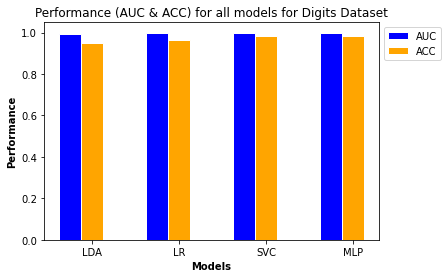

In [83]:
dic_models_digit = {}
Models = ["LDA","Logistic Regression","SVC","MLP"]
dic_models_digit["AUC"] = [0.995,0.997,0.998,0.999]
dic_models_digit["ACC"] = [0.947,0.965,0.983,0.985]
perf_dic_models_digit_dataframe = pd.DataFrame(dic_models_digit,index = Models)
display(perf_dic_models_digit_dataframe)

# set width of bars
barWidth = 0.25
Models_bis = ["LDA","LR","SVC","MLP"]
# set heights of bars
bars1 = dic_models_digit["AUC"]
bars2 = dic_models_digit["ACC"]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='AUC')
plt.bar(r2, bars2, color='orange', width=barWidth, edgecolor='white', label='ACC')

 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Performance', fontweight='bold')
plt.title("Performance (AUC & ACC) for all models for Digits Dataset")
plt.xticks([r + barWidth for r in range(len(bars1))], Models_bis)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In terms of AUC and ACC, MLP Classifier is the best although the others models have excellent score too (the metrics are always superior to 0.95). 

,Precision,Recall
LDA,"{1: 0.9, 7: 0.97, 8: 0.96}","{1: 0.98, 7: 0.92, 8: 0.93}"
Logistic Regression,"{1: 0.94, 7: 0.98, 8: 0.97}","{1: 0.99, 7: 0.96, 8: 0.95}"
SVC,"{1: 0.98, 7: 0.98, 8: 0.99}","{1: 0.99, 7: 0.97, 8: 0.99}"
MLP,"{1: 0.98, 7: 0.98, 8: 0.99}","{1: 0.99, 7: 0.98, 8: 0.98}"


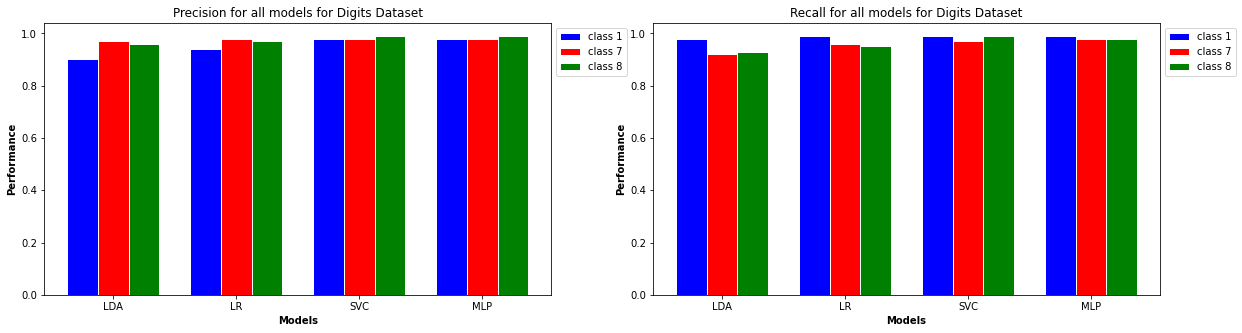

In [84]:
dic_models_digit = {}
Models = ["LDA","Logistic Regression","SVC","MLP"]
dic_models_digit["Precision"] = [{1:0.90,7:0.97,8:0.96},{1:0.94,7:0.98,8:0.97},{1:0.98,7:0.98,8:0.99},{1:0.98,7:0.98,8:0.99}]
dic_models_digit["Recall"] = [{1:0.98,7:0.92,8:0.93},{1:0.99,7:0.96,8:0.95},{1:0.99,7:0.97,8:0.99},{1:0.99,7:0.98,8:0.98}]
perf_dic_models_digit_dataframe = pd.DataFrame(dic_models_digit,index = Models)
display(perf_dic_models_digit_dataframe)




plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
# set width of bars
barWidth = 0.25
Models_bis = ["LDA","LR","SVC","MLP"]
# set heights of bars
bars1 = [x[1] for x in dic_models_digit["Precision"]]
bars2 = [x[7] for x in dic_models_digit["Precision"]]
bars3 = [x[8] for x in dic_models_digit["Precision"]]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='class 1')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='class 7')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='class 8')

 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Performance', fontweight='bold')
plt.title("Precision for all models for Digits Dataset")
plt.xticks([r + barWidth for r in range(len(bars1))], Models_bis)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 1))



plt.subplot(1,2,2)
# set width of bars
barWidth = 0.25
Models_bis = ["LDA","LR","SVC","MLP"]
# set heights of bars
bars1 = [x[1] for x in dic_models_digit["Recall"]]
bars2 = [x[7] for x in dic_models_digit["Recall"]]
bars3 = [x[8] for x in dic_models_digit["Recall"]]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='class 1')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='class 7')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='class 8')

 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Performance', fontweight='bold')
plt.title("Recall for all models for Digits Dataset")
plt.xticks([r + barWidth for r in range(len(bars1))], Models_bis)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

The precision and recall for each class and for each model are pretty close and more important they are close to 1 . But, in general, MLP still has the best result. 
<br/>
Regarding the recall, digit 1 is the class that is well classified (the recall for class 1  is higher than classes 7 and 8), for all the models. So, it seems that 1 is not hard to classify . For MLP, the recall for class 7 and 8 is almost the same , and therefore they are the classes that the model has difficulties to separate. Maybe , it is because the "white" pixel of a  8 and 7 are almost the same. But the recall for thoses classes is 0.98 which is very good ! 
<br/>
<br/>
For the precision for the MLP , they are almost the same and very close to 1.
<br/>
<br/>
In conclusion, all the model separates well the classes and MLP is the best one regarding all the metrics (AUC,ACC,Precision & Recall).

# 3.2.2 Study with the  best model<a class="anchor" id="section_3_2_2"></a>

# 3.2.2.1 Performances<a class="anchor" id="section_3_2_2_1"></a>

In [85]:
best_model = MLPClassifier(random_state=1)
best_model.fit(x2_train,y2_train)

MLPClassifier(random_state=1)

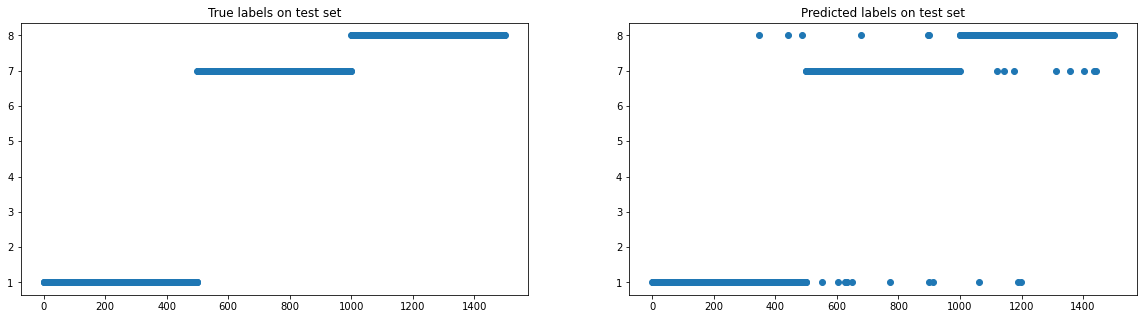

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(y2_test,"o")
plt.title("True labels on test set")
plt.subplot(1,2,2)
plt.plot(best_model.predict(x2_test),"o")
plt.title("Predicted labels on test set")
plt.show()


If we compare the two graphs, they are almost the same, which means that the classification is very good. There are some points that are not classified but the overwhelming majority is well classified. The model recognizes very well the digits !

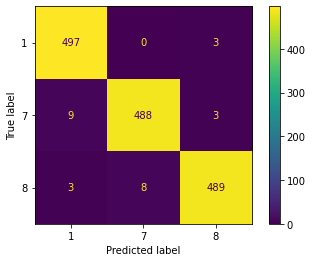

In [87]:
cm_digit = confusion_matrix(y2_test , best_model.predict(x2_test))
cm_disp_digit = ConfusionMatrixDisplay(confusion_matrix=cm_digit , display_labels=best_model.classes_)
cm_disp_digit.plot()

Clearly, 7 and 8 are the most difficult classes to recognize even if there is a small amount of misclassification for 7 and 8. This remark is to connect with the recall of this model.

In [88]:
def classified_digit(y2_test,y2_predicted):
    bad_ind = [] #index of misclassified digit
    good_ind = [] #index of well classified digit
    n = len(y2_test)
    for i in range(n):
        if y2_test[i] != y2_predicted[i] :
            bad_ind.append(i)
        else :
            good_ind.append(i)
    return good_ind,bad_ind

In [89]:
y2_predicted = best_model.predict(x2_test)

In [90]:
good_predictions,bad_predictions = classified_digit(y2_test,y2_predicted)

In [92]:
def show_digit(x2,y2,index,title="label"):
    plt.imshow(x2[index].reshape(28,28),interpolation='none', cmap=plt.gray())
    plt.title(""+title+ f" : {y2[index]}")

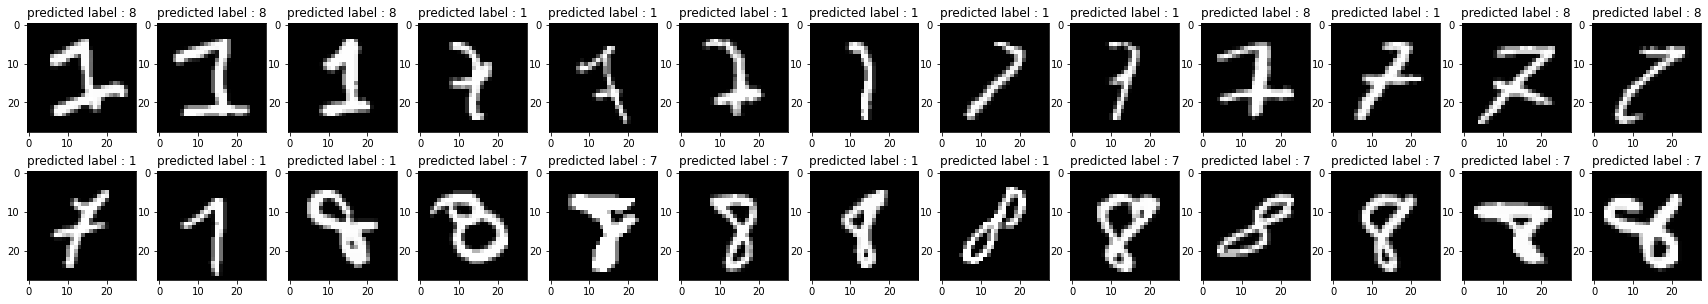

In [93]:
plt.figure(figsize=(30,5))
row=2
col=13
ind=1
for indice in bad_predictions:
    plt.subplot(row,col,ind)
    show_digit(x2_test,y2_predicted,indice,"predicted label")
    ind+=1
plt.show()

For the misclassified data, the behaviour is the following :
- 8 is classified as 7
- 7 is classified as 1 (most of th time) and 8
- 1 is classified as 8 (in minority)
<br/>
The misclassification between 7 and 8 can be explained by the fact that 7 and 8 have many "white" pixels in common and therefore the model confuses the two digits.
<br/>
But for the fact that 1 is classified as 8 , I don't expected that. I would've said that 1 can be classified as 7 because depending to the handwritting of 1 , it could look like a 7.
<br/> Finnaly, the fact that a 7 can be classified as 1 is predictable because the english handwritting of a 7 looks like a french handwritting of a 1 !

# 3.2.2.2 Adversial examples<a class="anchor" id="section_3_2_2_2"></a>

In [95]:
def adversial_examples_func(x2_test , ind):
    res = np.zeros((1000,784))
    for i in range(len(ind)):
        res[i] = x2_test[ind[i]]
    return res  

In [96]:
indices = good_predictions[0:334]+good_predictions[500:834]+good_predictions[1000:1332]
 

In [97]:
adversial_examples = adversial_examples_func(x2_test,indices)

In [98]:
adversial_examples = adversial_examples + (0.5*np.random.rand(1000,784))

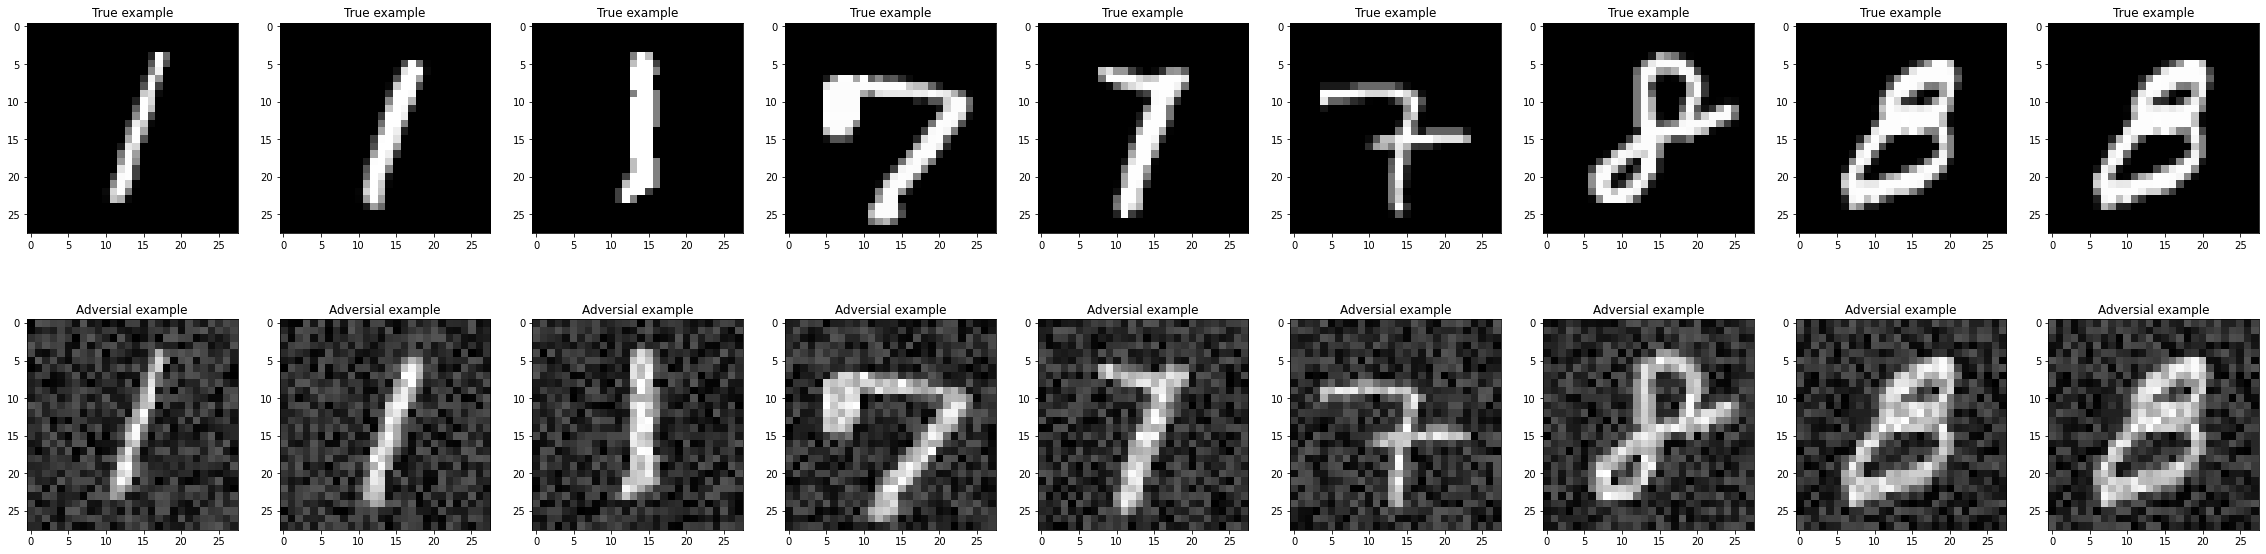

In [99]:
row = 2
col = 9
ind = 1
plt.figure(figsize=(40,10))
for i in [0,1,2,501,502,503,990,991,991]:
    plt.subplot(row,col,ind)
    plt.imshow(x2_test[indices[i]].reshape(28,28),interpolation='none', cmap=plt.gray())
    plt.title("True example")
    ind += 1
for i in [0,1,2,501,502,503,990,991,991]:
    plt.subplot(row,col,ind)
    plt.imshow(adversial_examples[i].reshape(28,28),interpolation='none', cmap=plt.gray())
    plt.title("Adversial example")
    ind +=1
plt.show()
    

As we can see above, even with the gaussian noise, we can still distinguisg clearly the class.

Let's test our best classifier (MLP Classifier) to those adversial examples and let's see the result

In [100]:
true_labels_adversial_examples = [y2_test[i] for i in indices]
predictions = best_model.predict(adversial_examples)
auc_ad = roc_auc_score(true_labels_adversial_examples, best_model.predict_proba(adversial_examples) , multi_class = 'ovo')
acc_ad = best_model.score(adversial_examples ,true_labels_adversial_examples)
print({'AUC' : round(auc_ad,3) , 'ACC' : round(acc_ad,3)})

{'AUC': 0.989, 'ACC': 0.675}


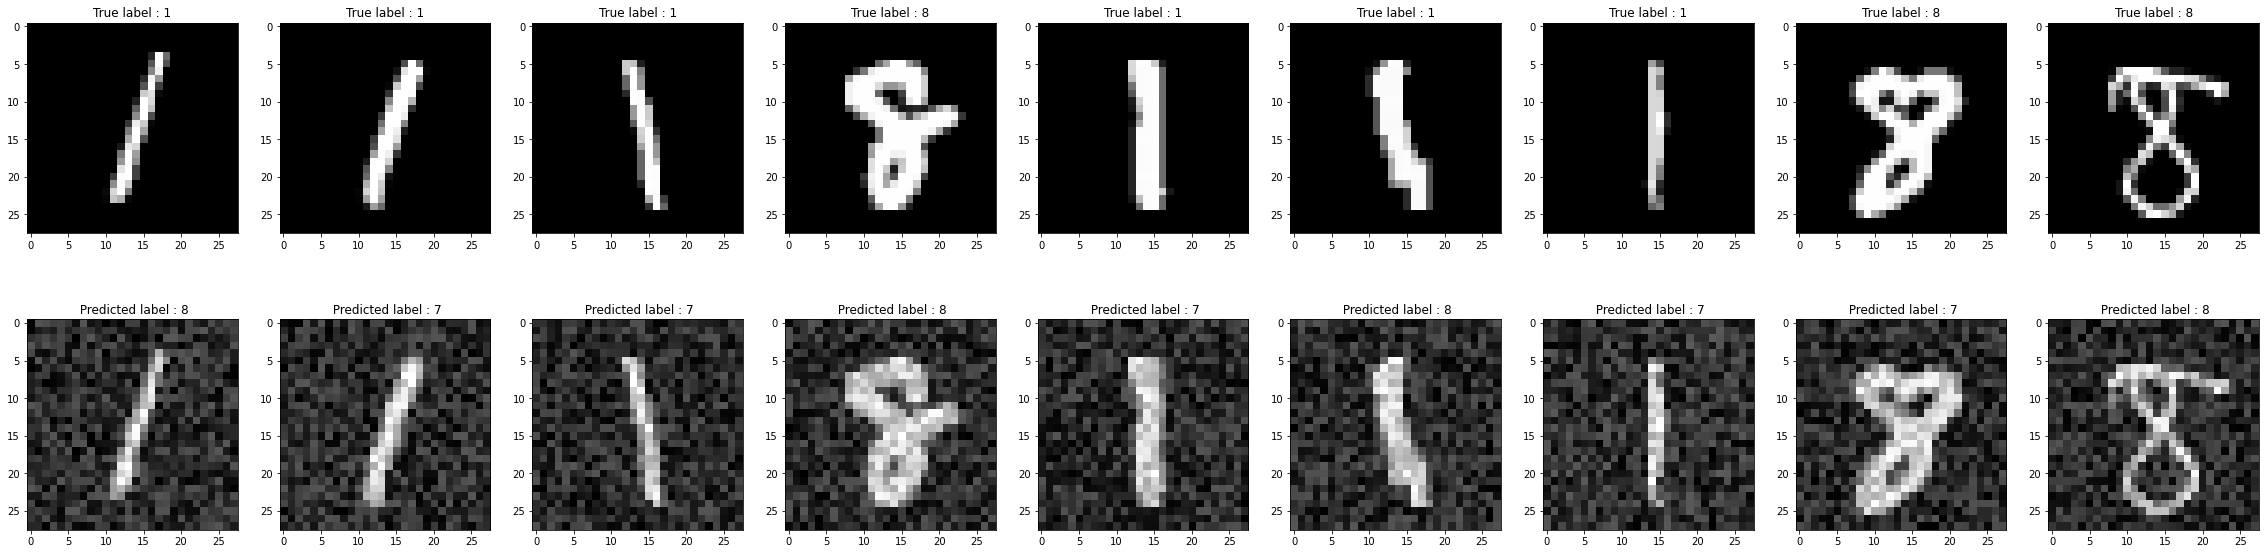

In [101]:
row = 2
col = 9
ind = 1
plt.figure(figsize=(40,10))
for i in [0,1,4,671,321,322,323,971,996]:
    plt.subplot(row,col,ind)
    plt.imshow(x2_test[indices[i]].reshape(28,28),interpolation='none', cmap=plt.gray())
    plt.title(f"True label : {y2_test[indices[i]]}" )
    ind += 1
for i in [0,1,4,671,321,322,323,971,996]:
    plt.subplot(row,col,ind)
    plt.imshow(adversial_examples[i].reshape(28,28),interpolation='none', cmap=plt.gray())
    plt.title(f" Predicted label : {predictions[i]}")
    ind +=1
plt.show()

Before introducing the gaussian noise, thoses examples were well classified by the model. Now, it is not the case even if we can clearly recognize the digit witht the noise. It shows that the model is very sensitive to the value of each pixel to classify the digit. As human being, we recognize digit by seeing the picture in its globality whereas the model pays attention to each pixel to build its criteria to classify. Therefore, if all the pixels are modified, the model makes bad decision.

# 4. BONUS CNN<a class="anchor" id="chapter4"></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

In [ ]:
img_rows, img_cols, nb_channels = 28, 28, 1

In [ ]:
learning_rate = 0.01
n_epochs = 10
batch_size = 64

# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)

# --- Size of the successive layers
n_h_0 = nb_channels  # number of input channels
n_h_1 = nb_filters
n_h_2 = nb_filters

In [ ]:
def category(y,num_class):
    
    
    
    n = y.shape[0]
    res = np.zeros((n,num_class))
    
    
    for i in range(n):
        
        if y[i]==1:
            
            res[i] = [1,0,0]
        if y[i]==7:
            res[i]= [0,1,0]
        if y[i] == 8 :
            res[i] = [0,0,1]
    return res


In [ ]:
X_train = x2_train.reshape(x2_train.shape[0], img_rows, img_cols, nb_channels)
X_test = x2_test.reshape(x2_test.shape[0], img_rows, img_cols, nb_channels)

#We transform the labels in a one hot vectors for each class
Y_train = category(np.ravel(y2_train),3)
Y_test = category(np.ravel(y2_test),3)

I will now define the CNN model. The input of the CNN is a set of (28,28,1) image tensors. We apply :

- a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same'
- a ReLu activation function

- a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same'
- a ReLu activation function
- a Max Pooling Layer of shape (2,2) and stride (2,2) (i.e. we reduce by two the size in each dimension)

- We then Flatten the data (reduce them to a vector in order to be able to apply a Fully-Connected layer to it)
- A softmax activation function which outputs are the $P(y_c | X)$ (multi-class problem)


In [ ]:
model = Sequential()
model.add(Conv2D(n_h_1 , kernel_size, input_shape=(img_rows, img_cols, n_h_0), name='Conv1' , activation='relu' , padding='same' , strides=(1,1)))
model.add(Conv2D(n_h_2, kernel_size,  name='Conv2' ,input_shape=(img_rows, img_cols, n_h_1), activation='relu' , padding='same',strides=(1,1)))
model.add(MaxPooling2D(pool_size=pool_size , strides = (2,2) , padding='same'))
model.add(Flatten())
model.add(Dense(units=3 , activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(X_train, Y_train , batch_size = batch_size , epochs= n_epochs)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
Conv2 (Conv2D)               (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18819     
Total params: 28,387
Trainable params: 28,387
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
47/47 [==============================] - 30s 10ms/step - loss: 0.2021 - accuracy: 0.9243
Epoch 2/10
47/47

In [ ]:
score = model.evaluate(X_test, Y_test,verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0652097761631012
Test accuracy: 0.984000027179718


In terms of accuracy, the CNN is slighty less efficiant than MLP but the difference is on the second significant number. But it is still one of the best model so far !

In [ ]:
X_adversial = adversial_examples.reshape(adversial_examples.shape[0], img_rows, img_cols, nb_channels)
Y_adversial = category(np.ravel(true_labels_adversial_examples),3)

In [ ]:
score = model.evaluate(X_adversial, Y_adversial,verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06105760857462883
Test accuracy: 0.9769999980926514


Contrary to MLP, CNN has better performance than MLP with adversial examples. The accuracy has nothing to do with the accuracy of MLP. With MLP, this metric was around 0.6 whereas with the CNN, it is about 0.98 !!
One reason of that is that NLP focuses only on pixels whereas CNN focuses on features on the picture. The different convolutions extract important features to characterise each digit. Therefore, CNN has a global view of the image and focuses on different areas of the image such as us human. It can explain the robusteness of CNN face to MLP !

# Discussion about the lab

This lab was very interesting because we use several methods to do classification and we can see  the strengths and weaknesses of each model. I have never used Grid Search CV but I realize that this function is very useful to fit the models and have the best model possible with all its parameters configured to give good results !
<br/> <br/>
The fact that we reused the digit dataset was interesting, because I could see how to use it in an unsupervised way (lab 1) and here in a supervised way. 